In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load Dataset

In [11]:
df = pd.read_csv('/content/sample_data/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


##Preprocessing

In [8]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [10]:
df = pd.get_dummies(df, drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [17]:
X = df.drop(columns=['price'], axis=1)
y = df['price']

In [18]:
X = pd.get_dummies(X, drop_first=True)

## Simple linear Regression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"""
    X_train.shape: {X_train.shape}
    X_test.shape: {X_test.shape}
    y_train.shape: {y_train.shape}
    y_test.shape: {y_test.shape}
""")


    X_train.shape: (436, 13)
    X_test.shape: (109, 13)
    y_train.shape: (436,)
    y_test.shape: (109,)



In [20]:
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
y_pred_simple = simple_model.predict(X_test)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [41]:
X = df[['area']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
y_pred_simple = simple_model.predict(X_test)

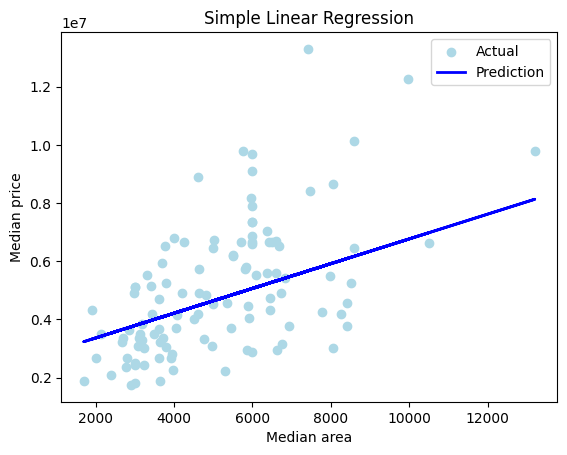

In [46]:
plt.scatter(X_test, y_test, color='lightblue', label='Actual')
plt.plot(X_test, y_pred_simple, color='blue', linewidth=2, label='Prediction')
plt.xlabel("Median area")
plt.ylabel("Median price")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [47]:
print("Simple Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("R² Score:", r2_score(y_test, y_pred_simple))

Simple Linear Regression Results:
MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644


## Multiple Linear Regression

In [52]:
X = df.drop('price', axis=1)
y = df['price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

In [53]:
print("\nMultiple Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R² Score:", r2_score(y_test, y_pred_multi))


Multiple Linear Regression Results:
MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


In [54]:
coeff_df = pd.DataFrame(multi_model.coef_, X.columns, columns=['Coefficient'])
print("\nTop 5 Influencing Features:")
print(coeff_df.sort_values(by='Coefficient', key=abs, ascending=False).head())


Top 5 Influencing Features:
                               Coefficient
bathrooms                     1.094445e+06
airconditioning_yes           7.914267e+05
hotwaterheating_yes           6.846499e+05
prefarea_yes                  6.298906e+05
furnishingstatus_unfurnished -4.136451e+05


## Residual Plot

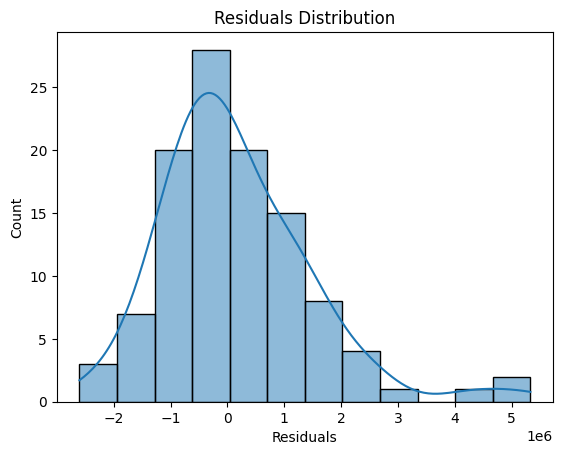

In [55]:
residuals = y_test - y_pred_multi
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()